# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [71]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [72]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "Gold Coast, Australia"
units = "Imperial"
city_url = (f'{url}appid={weather_api_key}&units={units}&q={city}')
test = requests.get(city_url + city).json()
test

{'coord': {'lon': 153.4146, 'lat': -28.0024},
 'weather': [{'id': 500,
   'main': 'Rain',
   'description': 'light rain',
   'icon': '10d'}],
 'base': 'stations',
 'main': {'temp': 69.13,
  'feels_like': 69.31,
  'temp_min': 68.97,
  'temp_max': 69.84,
  'pressure': 1020,
  'humidity': 76,
  'sea_level': 1020,
  'grnd_level': 1013},
 'visibility': 10000,
 'wind': {'speed': 1.01, 'deg': 336, 'gust': 4},
 'rain': {'1h': 0.87},
 'clouds': {'all': 100},
 'dt': 1730072917,
 'sys': {'type': 2,
  'id': 2019164,
  'country': 'AU',
  'sunrise': 1730055459,
  'sunset': 1730102544},
 'timezone': 36000,
 'id': 2165087,
 'name': 'Gold Coast',
 'cod': 200}

In [73]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
                                                    #{city name},{state code},{country code}&limit={limit}&appid={API key}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units={units}&q={city}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds =  city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ambovombe
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | wenling
Processing Record 5 of Set 1 | washim
Processing Record 6 of Set 1 | bardai
Processing Record 7 of Set 1 | olonkinbyen
Processing Record 8 of Set 1 | rongelap
Processing Record 9 of Set 1 | brooks
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | villa regina
Processing Record 14 of Set 1 | tura
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | pacific grove
Processing Record 17 of Set 1 | prince george
Processing Record 18 of Set 1 | hammerfest
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | adamstown
Processing Record 23 of Set

In [74]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [75]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ambovombe,-25.1667,46.0833,72.43,94,61,3.65,MG,1730072917
1,saint-philippe,-21.3585,55.7679,75.34,87,85,4.50,RE,1730072919
2,hithadhoo,-0.6000,73.0833,81.27,78,72,11.16,MV,1730072920
3,wenling,28.3669,121.3600,61.56,89,100,8.39,CN,1730072921
4,washim,20.1000,77.1500,67.24,66,89,2.75,IN,1730072922


In [76]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [77]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ambovombe,-25.1667,46.0833,72.43,94,61,3.65,MG,1730072917
1,saint-philippe,-21.3585,55.7679,75.34,87,85,4.50,RE,1730072919
2,hithadhoo,-0.6000,73.0833,81.27,78,72,11.16,MV,1730072920
3,wenling,28.3669,121.3600,61.56,89,100,8.39,CN,1730072921
4,washim,20.1000,77.1500,67.24,66,89,2.75,IN,1730072922


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

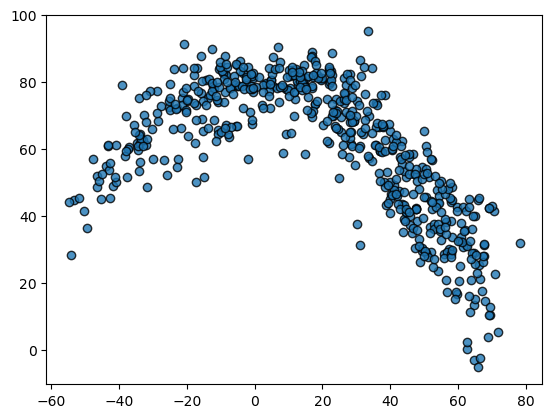

In [78]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

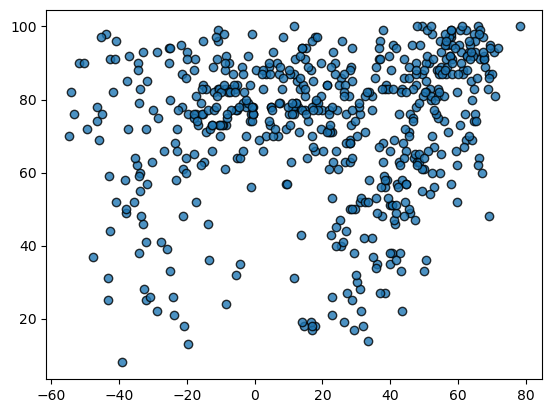

In [79]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

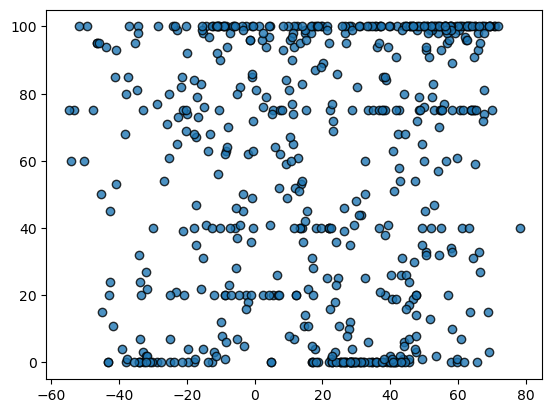

In [80]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

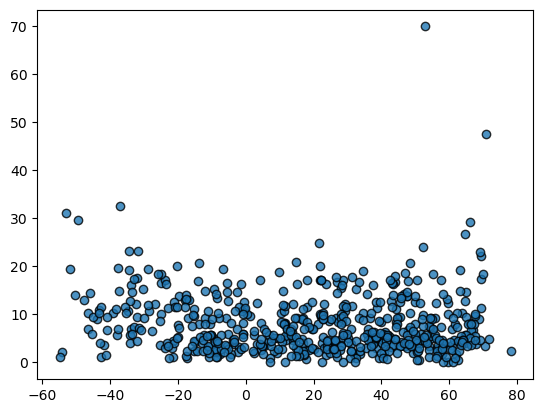

In [81]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [98]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
  
    regress_values = x_values * slope + intercept
   
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Latitude vs {title}")
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()

In [99]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

Northern_Hemisphere_data = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
Northern_Hemisphere_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,wenling,28.3669,121.3600,61.56,89,100,8.39,CN,1730072921
4,washim,20.1000,77.1500,67.24,66,89,2.75,IN,1730072922
5,bardai,11.6500,7.2333,69.96,31,7,8.21,NG,1730072923
6,olonkinbyen,70.9221,-8.7187,22.60,81,100,47.56,SJ,1730072924
7,rongelap,11.1635,166.8941,83.43,78,77,8.16,MH,1730072926


In [100]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0 )]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ambovombe,-25.1667,46.0833,72.43,94,61,3.65,MG,1730072917
1,saint-philippe,-21.3585,55.7679,75.34,87,85,4.50,RE,1730072919
2,hithadhoo,-0.6000,73.0833,81.27,78,72,11.16,MV,1730072920
9,bredasdorp,-34.5322,20.0403,59.79,90,100,23.13,ZA,1730072928
10,grytviken,-54.2811,-36.5092,28.45,82,60,2.08,GS,1730072929


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7661188369916982


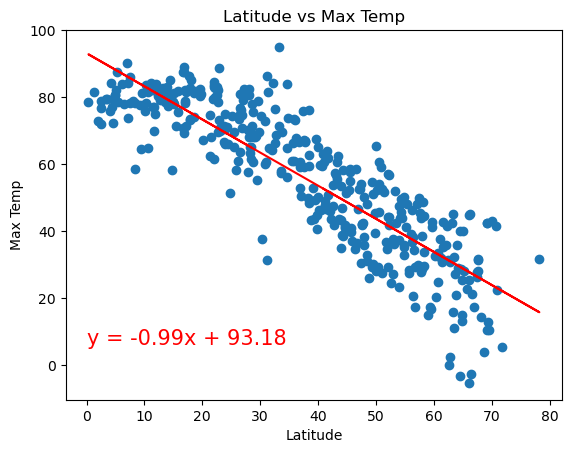

In [101]:
# Linear regression on Northern Hemisphere
x_values = Northern_Hemisphere_data["Lat"]
y_values = Northern_Hemisphere_data["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (0,6))


The r^2-value is: 0.5356104123193496


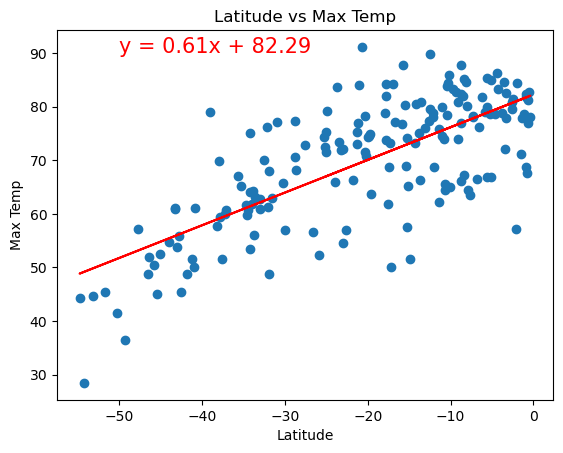

In [102]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-50,90))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The first plot has a negative correlation however the r value is 0.76 which means the relationsip between the two variables explains 76% of the variation in the data (moderate correlation).
The second plot has a positive correlation and the rvalue is 0.5 which means the relationship between the two variables explains 50% of the variation in the data (weak correlation).

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.04541820079060757


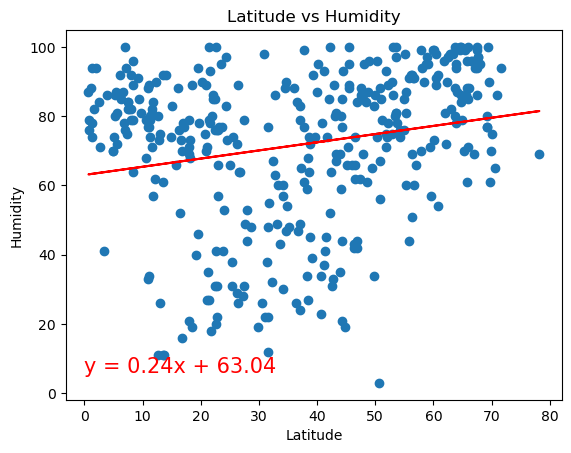

In [60]:
# Northern Hemisphere
x_values = Northern_Hemisphere_data["Lat"]
y_values = Northern_Hemisphere_data["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (0,6))

The r^2-value is: 0.04779250518874635


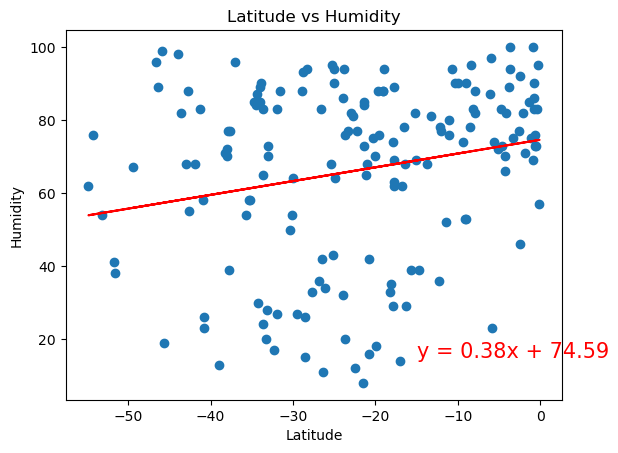

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-15,15))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The first plot has a positive correlation however the r value is 0.04 which means the relationsip between the two variables explains 4% of the variation in the data (weak correlation).
The second plot has a positive correlation however the r value is 0.04 which means the relationsip between the two variables explains 4% of the variation in the data (weak correlation).

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.01503609231607568


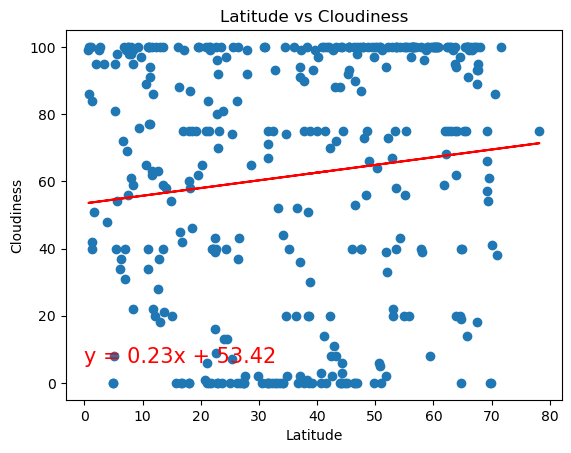

In [63]:
# Northern Hemisphere
x_values = Northern_Hemisphere_data["Lat"]
y_values = Northern_Hemisphere_data["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (0,6))

The r^2-value is: 0.021430733622143514


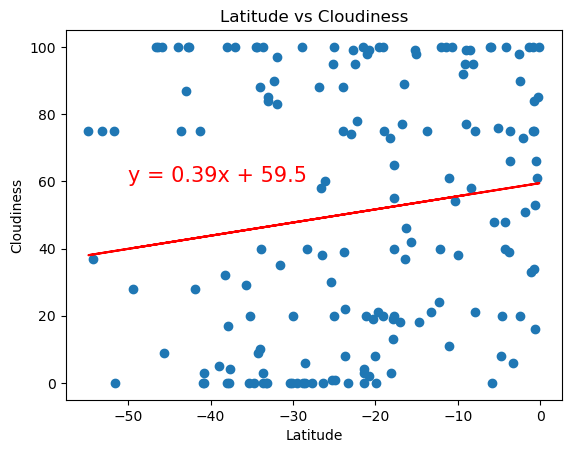

In [65]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-50,60))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The first plot has a positive correlation however the r value is 0.01 which means the relationsip between the two variables explains 1% of the variation in the data (very weak correlation).
The second plot has a positive correlation however the r value is 0.02 which means the relationsip between the two variables explains 2% of the variation in the data (very weak correlation).

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.0019253864090327585


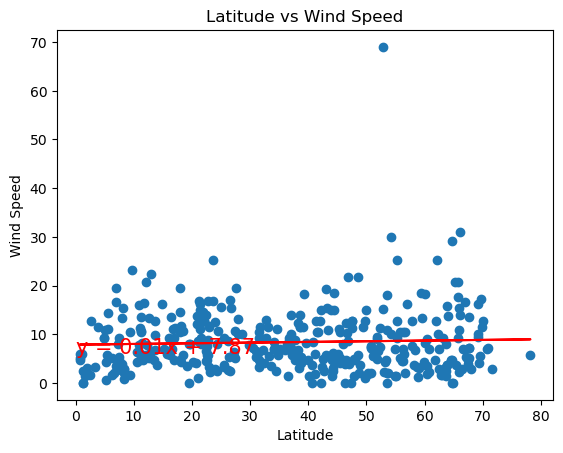

In [68]:
# Northern Hemisphere
x_values = Northern_Hemisphere_data["Lat"]
y_values = Northern_Hemisphere_data["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (0,6))

The r^2-value is: 0.0866404060783139


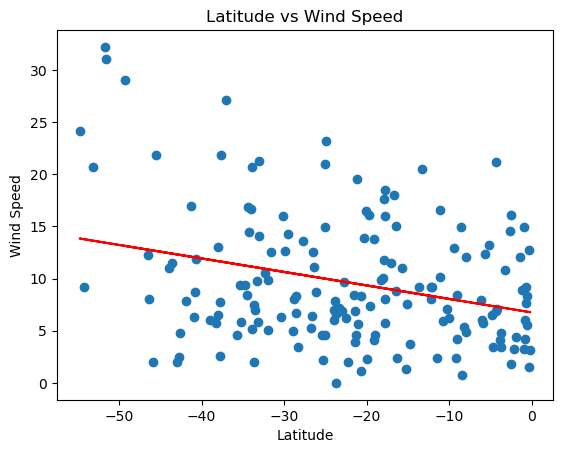

In [69]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50,60))

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The first plot has a positive correlation however the r value is 0.001 which means the relationsip between the two variables explains 0.1% of the variation in the data (very weak correlation or no correlation at all).
The second plot has a negative correlation however the r value is 0.08 which means the relationsip between the two variables explains 8% of the variation in the data (weak correlation).